# **Master in Data Science - Machine Learning**

Authors: Frida Ibarra Y Gema Romero

### **Notebook 2. Data Processing**

**This notebook is focused on Data Processing:**  

Data processing is a critical step to ensure that modeling algorithms perform efficiently and accurately. Below is the structured approach for preparing and transforming the data:

1. **Train-Test Split:**  
   Dividing the data into training and testing sets is essential to assess the model's ability to generalize to new data.  

2. **Outlier Treatment:**  
   Outliers can bias model results or negatively impact performance. Handling them effectively ensures data quality and model robustness.  

3. **Analysis of Relationships Between Variables**  

   3.1. **Correlation Matrix:**  
   Calculate correlations between numerical variables using Pearson's coefficient. This helps identify multicollinearity, i.e., very strong relationships between independent variables, which can impact model performance.  

   3.2. **Cramér’s Matrix:**  
   To evaluate relationships between categorical variables, use Cramér’s V, a measure of association that ranges from 0 (no relationship) to 1 (perfect relationship).  
   This analysis identifies significant relationships between categorical variables or with the target variable, aiding decisions on whether to combine, transform, or remove variables.  

4. **Additional analysis: WOE (Weight of Evidence) and Information Value (IV)**  
   These metrics help evaluate the predictive quality of the variables, providing insights into their contribution to the model.  

### LIBRARIES

In [30]:
import os
import pandas as pd
import numpy as np
import openpyxl
import missingno as msno
from colorama import Fore, Style
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from sklearn.model_selection import train_test_split
import scipy.stats

### AUXILIAR FUNCTIONS

In [31]:
sys.path.append('../src')  # Asegúrate de que ../src es la carpeta donde está Funciones_Ayuda.py
import functions_src as fa  # Ahora debería importarse correctamente
sys.path.remove('../src')

#Seed 
seed = 25

### DATASET

In [32]:
#Get the current working directory path
current_path = os.getcwd()
current_path

#Importing the dataset
data = '../data/Processing_data/application_data(1).csv'
df_loans = pd.read_csv(data)
df_loans.head()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
#Drop the first column 
df_loans.drop(columns=['Unnamed: 0'], inplace=True)

In [34]:
#Importing the dictionary 
dictionary = '../data/columns_description.xlsx'
df_loans_dictionary = pd.read_excel(dictionary)
df_loans_dictionary.head()

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN


### **SEPARATION OF TRAIN AND TEST**

To split the data into Train and Test sets, it is important to ensure that the proportions of the Target variable remain consistent. The proportions, which were previously calculated in Notebook 1, are as follows:

In [35]:
# Create the DataFrame for the TARGET variable with value counts
target_df_count = df_loans['TARGET'].value_counts().reset_index()

# Create the DataFrame for the TARGET variable and its percentage distribution
target_df_percent = df_loans['TARGET']\
    .value_counts(normalize=True)\
    .mul(100).rename('percent').reset_index()\
    .round(2)

# Merge the DataFrames
target_df_merge = pd.merge(target_df_count, target_df_percent, on='TARGET', how='inner')
target_df_merge

,TARGET,count,percent
0,0,282686,91.93
1,1,24825,8.07


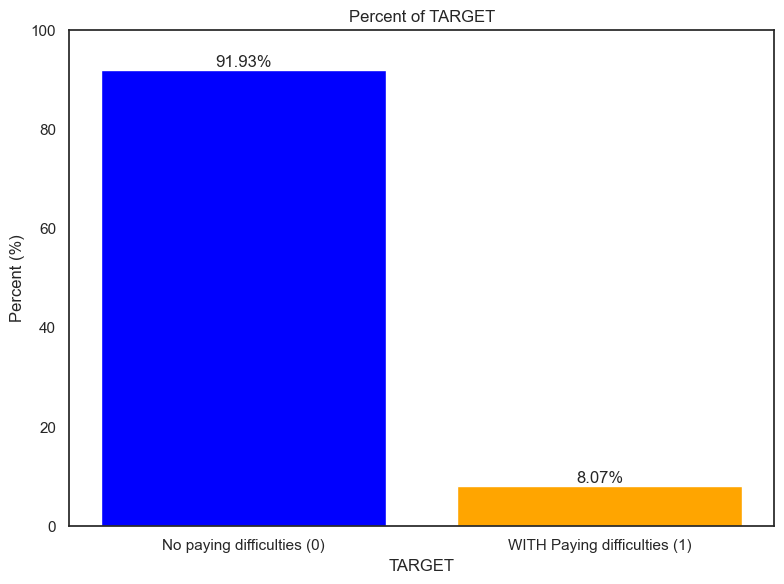

In [36]:
# Set up a grid and plot size
fig, ax = plt.subplots(figsize = (8,6)) 

# Create a bar chart
bar_plot= plt.bar(target_df_merge['TARGET'], target_df_merge['percent'], color=['blue', 'orange'])

# Adjust Y-axis limit:
plt.ylim(0, 100)

# Label bars with percentages
for bar in bar_plot:
    yvalue = bar.get_height()  # Obtain the height of each bar
    plt.text(bar.get_x() + bar.get_width() / 2, yvalue + 0.02, f'{yvalue:.2f}%', 
             ha='center', va='bottom', fontsize=12)
    

# Title and labels
plt.xlabel('TARGET')
ax.set_xticks([0,1], labels=['No paying difficulties (0)', 'WITH Paying difficulties (1)']) #X-axis labeling
plt.ylabel('Percent (%)')
plt.title('Percent of TARGET')
plt.xticks(target_df_merge['TARGET'])  # Asegura que las etiquetas del eje X sean correctas

plt.tight_layout()
plt.show()

**We have ensure that the proportions of the Target variable remain consistent. Now we are going to continue by separating the dataset in Train and Test:**

For our dataset, it has been decided to use 20% of the total for training, considering that, since it is a large dataset, this proportion is sufficient to train the model effectively while reserving a significant amount of data to evaluate its performance.

This choice also helps mitigate issues such as overfitting, as an excessively large training set could cause the model to fit too closely to the data, compromising its ability to generalize to new, unseen data.

Initially, the 80/20 split seems adequate for the current needs, although the proportion may be adjusted in the future, for example, with a 70/15/15 split that includes a dedicated validation set for cross-validation.

In [37]:
X_df_loans_train, X_df_loans_test, y_df_loans_train, y_df_loans_test = train_test_split(
    df_loans.drop('TARGET', axis=1),  # Drop the target variable to use the rest as predictor variables (X)
    df_loans['TARGET'],  # Target variable (y)
    stratify=df_loans['TARGET'],  # Ensures stratification of the target variable
    test_size=0.2,  # Size of the test set
    random_state=seed
)

df_loans_train = pd.concat([X_df_loans_train, y_df_loans_train], axis=1)
df_loans_test = pd.concat([X_df_loans_test, y_df_loans_test], axis=1)

**We compare the proportions to ensure that the stratification has been done correctly:**

In [38]:
# Proportion in the original dataset
print("Original distribution:")
print(df_loans['TARGET'].value_counts(normalize=True))

# Proportion in the training set
print("\nTraining set distribution:")
print(y_df_loans_train.value_counts(normalize=True))  

# Proportion in the test set
print("\nTest set distribution:")
print(y_df_loans_test.value_counts(normalize=True))  


Original distribution:
TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

Training set distribution:
TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

Test set distribution:
TARGET
0    0.919272
1    0.080728
Name: proportion, dtype: float64


It can be affirmed that the stratification has been done correctly since the proportions of the target variable are preserved for both the training and test datasets.

It should be noted that the target variable is highly imbalanced. In this case, it means that there are very few customers experiencing payment difficulties (8.07%) compared to a large proportion of customers who do not face difficulties in paying (91.93%). Therefore, it is possible that, prior to modeling, oversampling may be required to help compensate for this imbalance to some extent.

### **OUTLIER TREATMENT**

It is crucial that we ensure that the atipical values of the dataset do not distort the analysis or model predictions.

In [39]:
# First, select the numerical columns excluding the boolean ones
numerical_columns_without_booleans = [col for col in df_loans_train.select_dtypes(include=[np.number]).columns if df_loans_train[col].dtype != 'bool']

# View the column names
print(numerical_columns_without_booleans)

# Set the display option to show all rows in the DataFrame
pd.set_option('display.max_rows', None)

# Calculate the deviation of the mean percentage for the numerical columns, using a target variable and a multiplier of 3
fa.get_deviation_of_mean_perc(df_loans_train, numerical_columns_without_booleans, target='TARGET', multiplier=3)

['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MO

,variable,sum_outlier_values,percentage_sum_null_values,0,1
68,FLAG_DOCUMENT_6,21611,0.087847,0.945074,0.054926
70,FLAG_DOCUMENT_8,20016,0.081363,0.925510,0.074490
90,TARGET,19860,0.080729,NaN,1.000000
16,REG_CITY_NOT_LIVE_CITY,19214,0.078103,0.876757,0.123243
10,FLAG_EMAIL,13974,0.056803,0.921640,0.078360
14,REG_REGION_NOT_WORK_REGION,12515,0.050872,0.912265,0.087735
15,LIVE_REGION_NOT_WORK_REGION,10064,0.040909,0.916832,0.083168
86,AMT_REQ_CREDIT_BUREAU_WEEK,6839,0.027800,0.921334,0.078666
5,REGION_POPULATION_RELATIVE,6637,0.026979,0.959922,0.040078
61,DEF_30_CNT_SOCIAL_CIRCLE,5493,0.022329,0.881668,0.118332


Given the nature of the current analysis and the distribution of the identified outlier values, addressing them is not considered a priority at this initial stage. Many of the variables affected by extreme values, such as documentary flags or specific indicators, have a relatively small impact on the overall dataset (with proportions under 10%). Moreover, their discrete nature suggests that these values may represent useful information rather than noise or errors.

However, the possibility of addressing the outliers in future stages of the analysis is not ruled out, especially if they affect the stability or performance of subsequent predictive models. The current focus is on preserving data integrity and exploring how these anomalies interact with the target variable before making any definitive decisions regarding their treatment.

### **ANALYSIS OF RELATIONSHIPS BETWEEN VARIABLES**

Understanding the relationships between variables is crucial to gaining insights from the dataset. By identifying correlations and associations between different features, we can inform decisions such as feature selection, model choice, and further preprocessing steps. This section focuses on exploring the interactions between various features in the dataset, with a particular emphasis on how they relate to the target variable.

##### **CORRELATION MATRIX**

A correlation matrix is a statistical method used to assess the relationship between multiple variables in a dataset. It is represented as a table where each cell contains a correlation coefficient. A value of 1 indicates a perfect positive relationship between the variables, 0 represents no relationship, and -1 denotes a perfect negative relationship. This matrix is useful for identifying trends and patterns, helping inform decisions based on the relationships between variables.

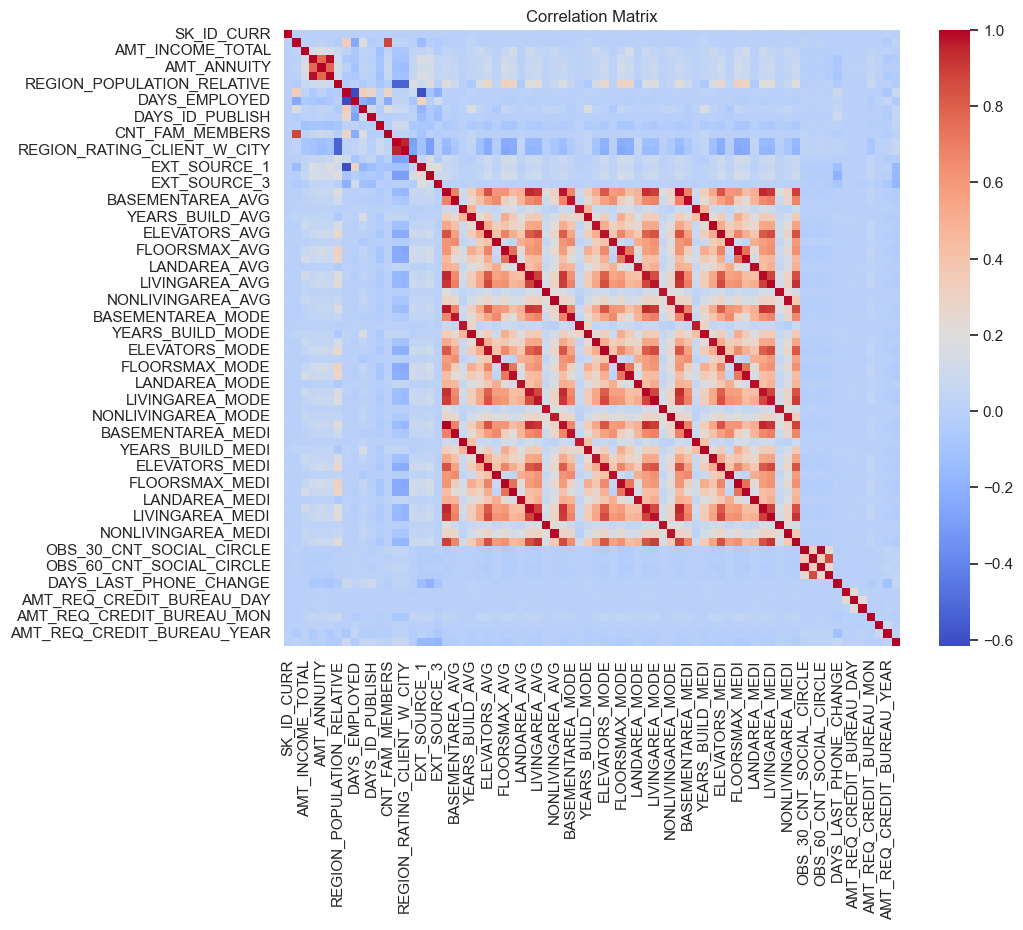

In [40]:
boolean_columns = df_loans.columns[df_loans.isin([0, 1]).all()]

corr = pd.concat([df_loans_train.select_dtypes('number').drop(boolean_columns, axis=1), df_loans_train['TARGET']], axis=1).corr(method='pearson')

# Plot the correlation matrix with seaborn
plt.figure(figsize=(10, 8))  # Figure size
sns.heatmap(corr, cmap='coolwarm', fmt='.2f', cbar=True, square=True)

# Add title
plt.title('Correlation Matrix')

# Display the plot
plt.show()

##### **CONCLUSIONS**

The correlation matrix reveals the linear relationships between the numerical variables in the dataset. Based on the visualization:

1. **Strong Correlations**: There are highly correlated variables, suggesting redundancy between them. For example, the variables `BASEMENTAREA_AVG`, `BASEMENTAREA_MODE`, and `BASEMENTAREA_MEDI` are closely related to each other.

2. **Low Correlations**: Most of the variables show low or near-zero correlations, indicating that there is no strong linear relationship between them.

3. **Structured Regions**: Blocks of variables with consistent correlations are observed, which may indicate similar behaviors between them.

4. **Independent Variables**: Some variables, such as `SK_ID_CURR`, show low correlations with the rest, suggesting that they do not significantly influence the other variables.

#### **CRAMERS V MATRIX**

The Cramér's V matrix is used to measure the association between two categorical variables. Its coefficient ranges from 0 (no relationship) to 1 (perfect relationship).

In this case, it is highly useful for analyzing the dependency in contingency tables.

For our loan approval dataset, it will allow us to assess the relationship between variables such as "gender", "type of house", "house materials", "applicant type", etc., with the TARGET variable, which takes the value 1 if there was a delay in any loan repayment and 0 otherwise.

Thus, a high Cramér's V value suggests that those variables have an impact on the likelihood of default.

For this analysis, only variables with more than two categories will be considered, as mentioned before. Additionally, boolean variables are highly imbalanced, and therefore have been excluded from the analysis. In such cases, Cramér's V might not provide a clear or useful view of the relationship.

**Convert the neccessary variables to boolean for the analysis and see the relation with the TARGET variable:**

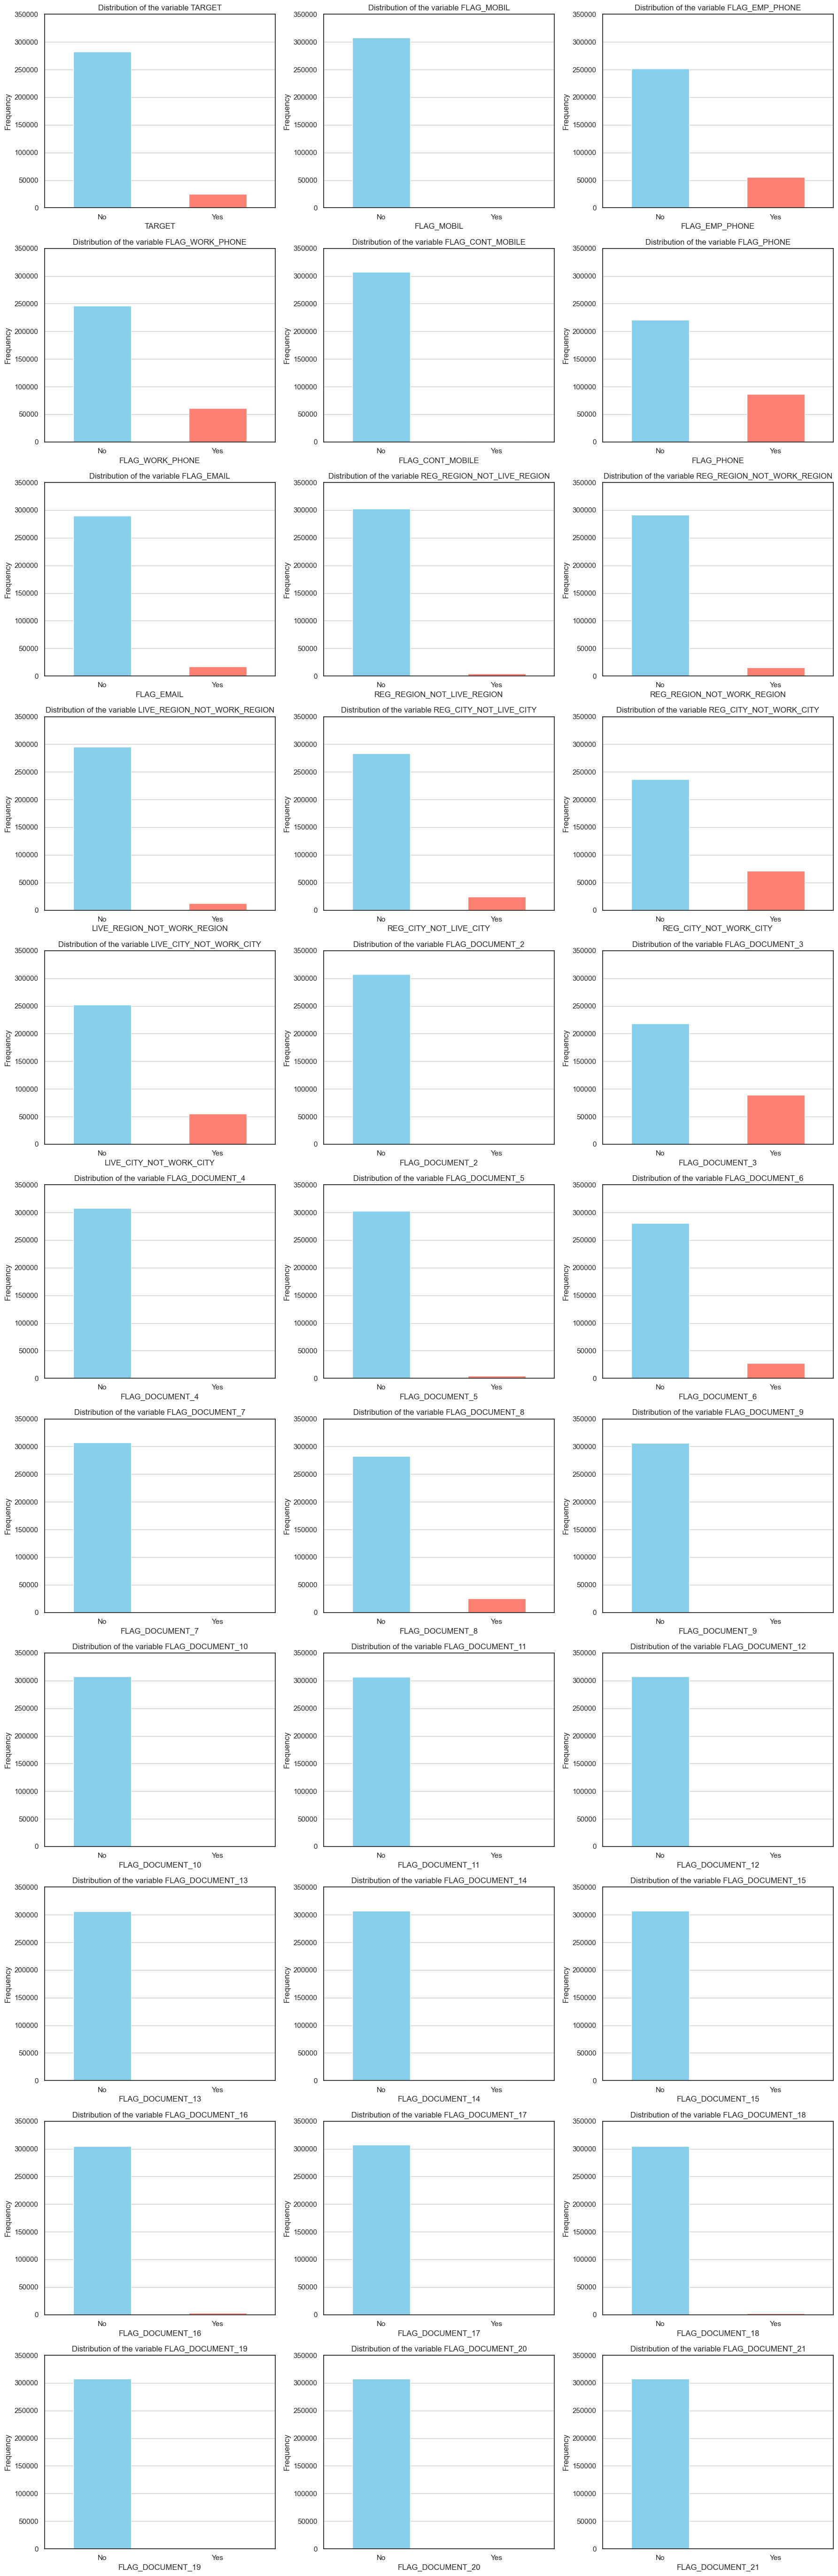

In [41]:
# Select the numeric columns that only contain values 0 and 1
boolean_columns = df_loans.columns[df_loans.isin([0, 1]).all()]

# Convert the selected columns to boolean type
df_loans[boolean_columns] = df_loans[boolean_columns].astype(bool)

# Select the boolean columns
boolean_columns = df_loans.select_dtypes(include=['bool']).columns

# Number of columns in the grid
n_cols = 3
n_rows = (len(boolean_columns) // n_cols) + (1 if len(boolean_columns) % n_cols != 0 else 0)

# Create a figure and a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()  # Flatten the axes array for easier access

# Create bar plots for each boolean column
for i, col in enumerate(boolean_columns):
    ax = axes[i]
    df_loans[col].value_counts().plot(kind='bar', color=['skyblue', 'salmon'], ax=ax)
    ax.set_title(f'Distribution of the variable {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.set_ylim(0, 350000)
    ax.grid(axis='y')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['No', 'Yes'], rotation=0)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

**Conclusions**

After graphing the frequencies of the boolean variables, that is, analyzing the number of occurrences of each category of the variables, the following conclusions were drawn:

- At first glance, it is evident that there is a significant imbalance between categories, which aligns with the previous statement that the data is unbalanced.

- Most applicants have not submitted the majority of the documents, except for document 3 and document 6. This may be because they were not mandatory or will be required in the future.

- The least imbalanced variables are: FLAG_EMP_PHONE, FLAG_PHONE, FLAG_WORK_PHONE, REG_CITY_NOT_WORK_CITY. The first three describe whether the client provides their phone number. The last one (REG_CITY_NOT_WORK_CITY) provides information about clients who live and work in the same city.

To determine the predictive significance of the variables, an additional metric, WOE (Weight of Evidence), will be calculated to establish the relevance of the independent variables based on their relationship with the TARGET variable.



**Show the correlation matrix for the boolean variables to gain insight:**

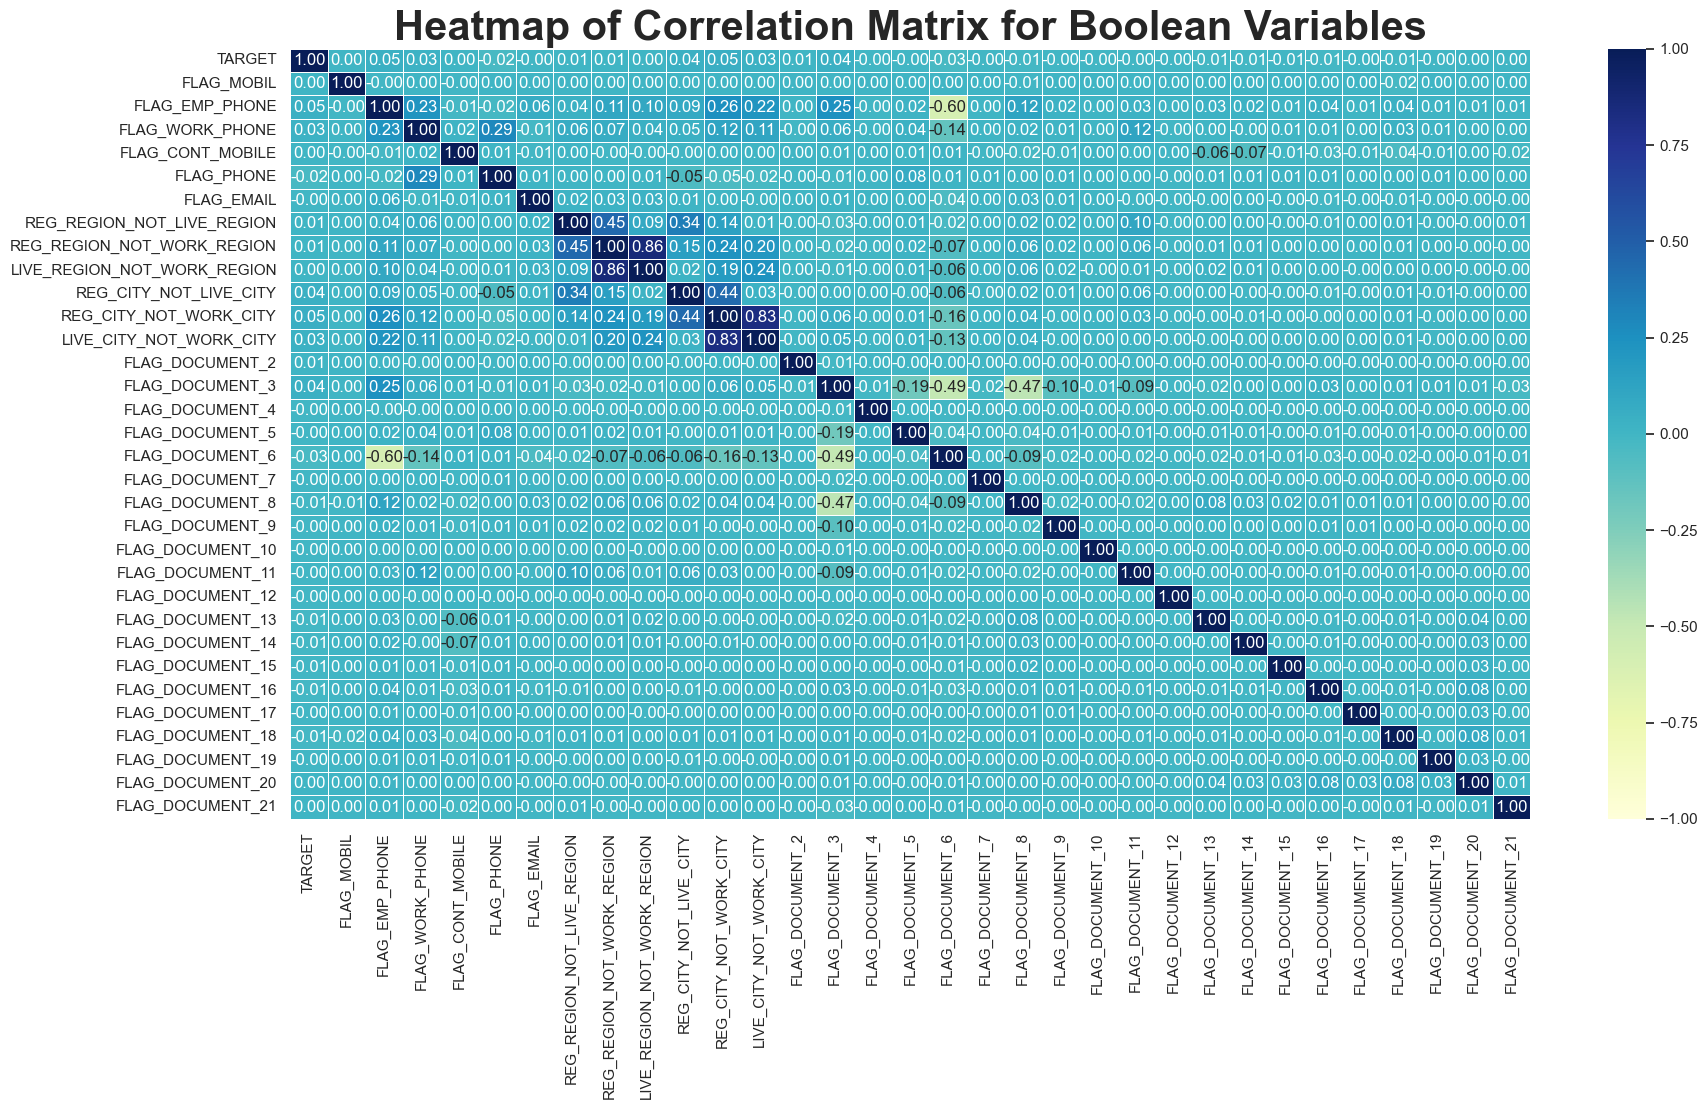

In [42]:
# Calculate the correlation matrix for the boolean variables
corr_matrix = df_loans[boolean_columns].corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)

# Title in bold and larger font
plt.title('Heatmap of Correlation Matrix for Boolean Variables', fontweight='bold', fontsize=30)
plt.show()

##### **Commentary of the matrix**

The presented correlation matrix shows how different boolean variables in the dataset are related to each other, including the target variable TARGET, which indicates whether a customer is late in payment. Each cell reflects the strength of the correlation between the variables.

Values closer to 1 (darker tones) represent a strong relationship, while values closer to 0 (lighter tones) indicate little or no correlation. 

It is observed that the variables `REG_REGION_NOT_WORK_REGION` and `LIVE_REGION_NOT_WORK_REGION` show a moderate correlation (0.45), suggesting that working and living in different regions might be associated in the dataset.

Regarding the `TARGET` variable, most correlations are low, with values less than 0.1. This indicates that the boolean variables analyzed have little direct influence on payment delays.

Variables such as `FLAG_EMAIL`, `FLAG_PHONE`, and `FLAG_DOCUMENT_X` show very low correlations with `TARGET`, suggesting that these features are not determinants of the customer's payment behavior.

Overall, the correlations in the matrix are weak, which is common in the analysis of boolean variables. However, it is important to evaluate these relationships in conjunction with other variables to capture more complex patterns and enhance the predictive model.

#### **Finally, Cramers V Matrix:**

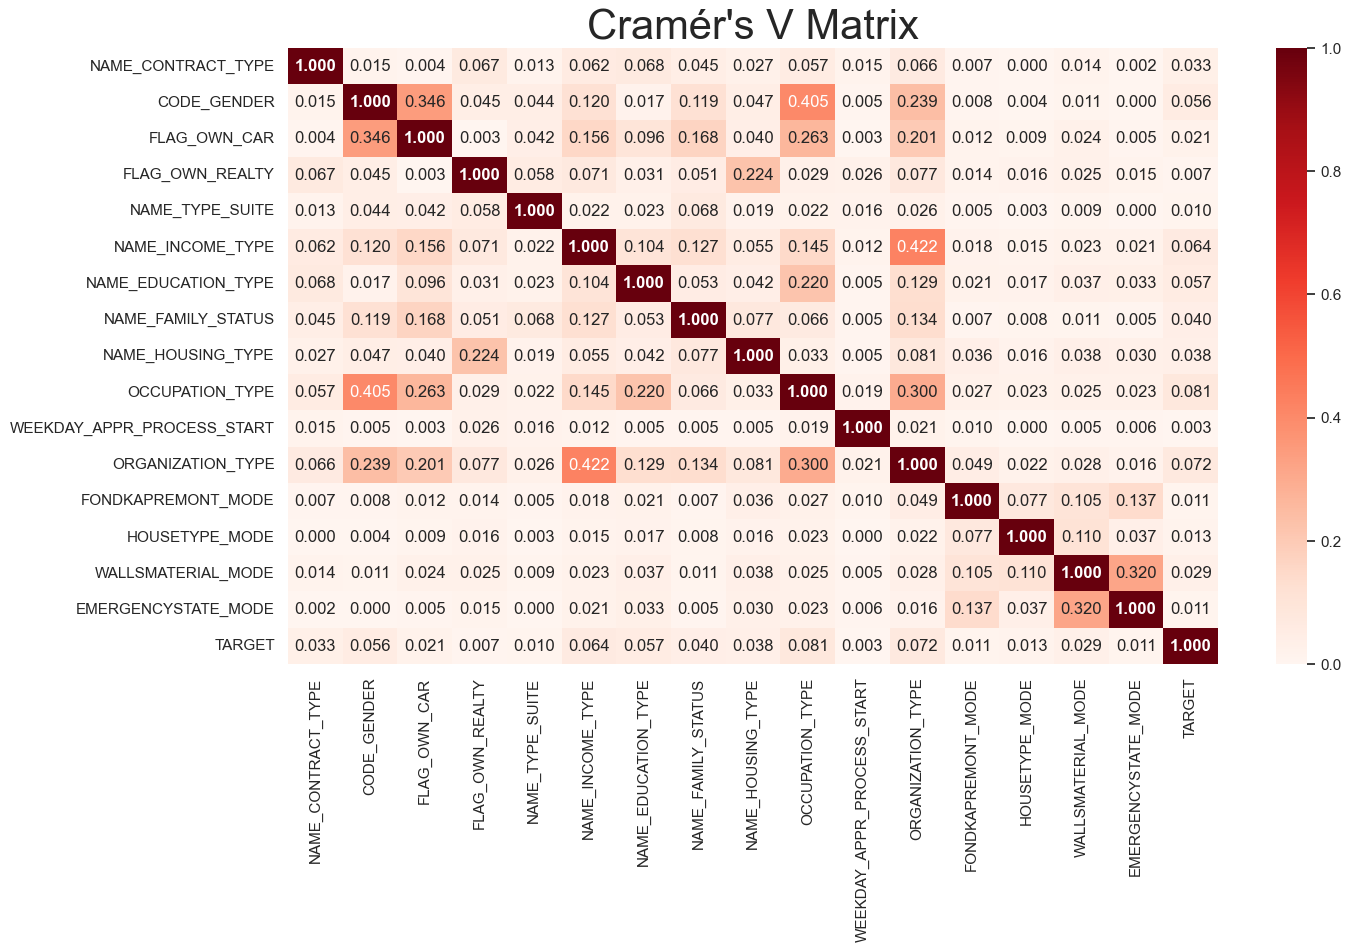

In [43]:
# Call the function and store the results in variables
col_bool, col_cat, col_num = fa.categorize_columns(df_loans)

# Make sure to include the TARGET variable
col_cat_str = list(X_df_loans_train[col_cat].select_dtypes('object').columns.values)

# Manually add 'TARGET' if it's not already in the list
if 'TARGET' not in col_cat_str:
    col_cat_str.append('TARGET')

# Create an empty matrix to store the Cramér's V values
cramers_matrix = pd.DataFrame(index=col_cat_str, columns=col_cat_str)

# Fill the matrix with the Cramér's V values
for col1 in col_cat_str:
    for col2 in col_cat_str:
        # Create the contingency table
        confusion_matrix = pd.crosstab(df_loans_train[col1], df_loans_train[col2])
        # Calculate Cramér's V
        cramers_matrix.loc[col1, col2] = fa.cramers_v(confusion_matrix.values)

# Convert the values to float so they can be properly read
cramers_matrix = cramers_matrix.astype(float)

# Adjust the color scheme and display the matrix
plt.figure(figsize=(15, 8))
sns.set(style='white')  # Cleaner style
# Create the heatmap with pink colors
ax = sns.heatmap(cramers_matrix, annot=True, fmt='.3f', cmap='Reds', cbar=True)

# Iterate over the annotations to make the high values bold
for text in ax.texts:
    if float(text.get_text()) > 0.5:  # High correlation threshold
        text.set_fontweight('bold')

# Add a title and customize it
plt.title('Cramér\'s V Matrix', fontdict={'size': 17}, fontsize=30)
plt.show()

##### **COMMENT ON THE MATRIX** 

The presented Cramér's V matrix analyzes the relationship between different categorical variables in the dataset, including the target variable TARGET, which indicates whether a customer is late on payment. Each cell shows the intensity of the association between the variables:

- Values closer to 1 (in darker shades) indicate stronger associations, while values closer to 0 (in lighter shades) reflect little to no relationship.  
- A moderate relationship is highlighted between `CODE_GENDER` and `OCCUPATION_TYPE` (0.405), which may suggest that certain occupations are more common among men or women.  
- Regarding `TARGET`, associations are generally low, with `ORGANIZATION_TYPE` (0.072) and `OCCUPATION_TYPE` (0.082) being the variables with the strongest relationships. This suggests that occupation and the type of organization where the customer works may have a slight influence on the risk of payment delays.  
- Variables like `FLAG_OWN_CAR` and `HOUSE_TYPE_MODE` show very low correlations with `TARGET`, indicating that these characteristics are not significantly associated with payment behavior.  

Overall, the associations in the matrix are weak, which is common in categorical data. However, the more significant relationships should be evaluated in context, as they may provide valuable insights for predictive modeling and decision-making.

#### **TREATING NULL VALUES**

As mentioned earlier, we are going to address the null values depending on the type of the data: 

- Due to the nature of the numerical value (they do not follow a normal distribution), we are opting for median imputation as it is a suitable choice. Although they do not present a high percentage of outliers, the median is robust against extreme values, unlike the mean. Additionally, machine learning models are often sensitive to extreme values, so using the median reduces the risk of introducing unwanted noise or bias into the analysis. This approach ensures that imputation does not significantly affect the quality of the models.

- Furthermore, the null values in the boolean variables will be imputed with the mode. In the case of boolean variables, which take only the values 0 or 1, the mode will be used for imputation, as it does not make sense to use the median, since the distribution only presents two possible values. Imputing with the mode ensures that missing values are filled with the most frequent value, maintaining consistency and avoiding introducing distortions in subsequent analyses. This approach is simple and effective for variables with a clear binary distribution.

- To impute the median, the median of the training set was calculated and applied to the test set. The same procedure was followed with the mode.

In [44]:
# 1. Inpute categorical values with the word missing:

fa.replace_nan_in_categorical(df_loans_train, df_loans_test)

#-----------------------------------------------------------------------------------------------------

# 2. Inpute NAN of numerical variables with median:

fa.impute_nan_numerical_with_median(df_loans_train,df_loans_test)

#-----------------------------------------------------------------------------------------------------

# 3. Inpute NAN of booleans variables with the mode:

fa.impute_nan_booleans_with_mode(df_loans_train,df_loans_test)

print()


**Verify if the imputations have worked:**

In [45]:
print(df_loans_train.isna().sum())  # Verify how many NaN are in each column of the train dataframe
print(df_loans_test.isna().sum())   # Verify how many NaN are in each column of the test dataframe

SK_ID_CURR                      0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
NAME_TYPE_SUITE                 0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
OWN_CAR_AGE                     0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBERS                 0
REGION_RATING_

As it is shown, we can confirm there are NO NaN left in our dataset. 

------------------------------------------------------------------------------------------------------------------------------------------------------------

## **Additional Analysis: WOE and IV**

We found it valuable to investigate the Weight of Evidence (WOE) and Information Value (IV) as part of our analysis, as they provide insightful metrics for understanding the relationship between predictors and the target variable. WOE allows us to assess the predictive power of each feature by comparing the distribution of values across different categories, while IV quantifies the strength of the relationship between a predictor and the target. This analysis helps in identifying the most significant variables and refining the model for better performance, especially in classification tasks.

### **WOE (Weight of Evidence)**

**1- Concept**  

WOE (Weight of Evidence) indicates the predictive power of an independent variable concerning the dependent variable. Originating in the field of credit scoring, it is generally described as a measure of the ability to separate good and bad customers. "Bad Customers" refer to those who defaulted on a loan (in this case, those facing payment difficulties), while "Good Customers" are those who repaid their loans, meaning they did not encounter difficulties during repayment.

In essence, WOE measures how well each group of attributes can predict the desired outcome of the dependent variable.

##### **WOE= ln ( Distribution of Goods ➗ Distribution of Bads )**

- Distribution of Goods - % of Good Customers (those NOT facing payment difficulties) in a particular group
- Distribution of Bads - % of Bad Customers (those facing payment difficulties) in a particular group
- ln - Natural Log

It is also good to understand WOE in terms of **events and non-events**.

##### **WOE = ln (% of non-events ➗ % of events)**

**2- STEPS**

**Step 1.  Verify the variable type:**

    If Continuous
    
Divide the data into 10 groups (or fewer, depending on the distribution). Ideally, each group should contain at least 5% of the cases

    If Categorical

Skip this step

**Step 2. Count the Good and Bad values in each group:**  

"Good" refers to positive events (e.g., customers who repaid).
"Bad" refers to negative events (e.g., customers who defaulted).

**Step 3. Calculate the % of Goods and Bads using the formula.**

**Step 4. Calculate the WOE for each group.**

**Step 5. Combine categories with similar WOE values:** 

If a variable has multiple groups, you can combine them if they have similar WOE values, as their behavior in predicting the target variable will be comparable. This simplifies the model and improves interpretability.

**3- Interpretation of Possible Results**

- A positive WOE indicates that the distribution of Goods (customers who repaid their loans) is greater than that of Bads (customers who defaulted). This suggests that the category or group has a relatively high proportion of positive events.

- A negative WOE indicates that the distribution of Goods is less than that of Bads. This implies that the category or group has a relatively high proportion of negative events.

Interpreting WOE is crucial to understanding the relationship between an independent variable and the behavior of the dependent variable (payment difficulties).

### **Information Value (IV)**

The Information Value (IV) and Weight of Evidence (WOE) have a direct and significant connection.  

IV is an exploratory analysis method that helps identify which variable in a dataset has predictive power or impact on the value of a specific binary dependent variable (0 or 1). In other words, it is a numerical indicator that measures the overall ability of an independent variable **X** to predict the behavior of the target variable.

##### **IV = ∑ (% of non-events - % of events) ·  WOE**

The Information Value (IV) is a useful metric for reducing the number of variables used when building a Logistic Regression model, especially when there are many potential variables. IV evaluates each independent variable individually, without considering the other predictor variables. Based on the IV values of each variable, their predictive power can be assessed using the following guidelines:

- **IV < 0.02**: The variable has no predictive power (not useful for the model).  
- **0.02 ≤ IV < 0.1**: The variable has weak predictive power.  
- **0.1 ≤ IV < 0.3**: The variable has moderate predictive power.  
- **IV ≥ 0.3**: The variable has strong predictive power (may be highly influential in the model).  

This approach helps prioritize the most relevant variables and discard those that do not add significant value to the model, optimizing both its accuracy and efficiency.

#### **WOE AND IV FOR CATEGORICAL VALUES**

In [46]:
df_loans = pd.read_csv(data)

# Calcular y mostrar el WOE e IV para cada variable categórica
categoric_val = df_loans.select_dtypes(['category', 'object']).columns

for var in categoric_val:
    print(f"Resultados para la variable categórica: {var}")
    
    try:
        # Calcular WOE e IV
        woe_iv = fa.calculate_woe_iv_cat(df_loans, var, 'TARGET')
        
        # Imprimir los resultados
        print(woe_iv[['WOE', 'IV']])  # Muestra solo las columnas WOE e IV por categoría
        iv_total = woe_iv['IV_Total'].iloc[0]  # IV Total
        print(f"IV Total para {var}: {iv_total:.4f}")
        
        # Clasificar la relevancia de la variable
        if iv_total < 0.02:
            print(f"La variable {var} no es relevante para el modelo.")
        elif 0.02 <= iv_total < 0.1:
            print(f"La variable {var} tiene un impacto moderado en el modelo.")
        else:
            print(f"La variable {var} tiene un impacto fuerte en el modelo.")
    except Exception as e:
           print(f"Error procesando la variable {var}: {e}")
    
    print("\n" + "-" * 50 + "\n")


Resultados para la variable categórica: NAME_CONTRACT_TYPE
TARGET                   WOE        IV
NAME_CONTRACT_TYPE                    
Cash loans         -0.036236  0.001206
Revolving loans     0.415538  0.013832
IV Total para NAME_CONTRACT_TYPE: 0.0150
La variable NAME_CONTRACT_TYPE no es relevante para el modelo.

--------------------------------------------------

Resultados para la variable categórica: CODE_GENDER
TARGET            WOE        IV
CODE_GENDER                    
F            0.154307  0.014696
M           -0.250931  0.023901
XNA          2.717999  0.000038
IV Total para CODE_GENDER: 0.0386
La variable CODE_GENDER tiene un impacto moderado en el modelo.

--------------------------------------------------

Resultados para la variable categórica: FLAG_OWN_CAR
TARGET             WOE        IV
FLAG_OWN_CAR                    
N            -0.056242  0.002137
Y             0.117353  0.004459
IV Total para FLAG_OWN_CAR: 0.0066
La variable FLAG_OWN_CAR no es relevante para

### **WOE and IV Results for Categorical Variables**

Based on the Information Value (IV), the impact of each variable on the model can be assessed. For categorical variables, none are found to have a significant impact on the model. Most categorical variables are not relevant, while some are moderately relevant. These variables include **CODE_GENDER**, **NAME_INCOME_TYPE**, **NAME_FAMILY_STATUS**, and **OCCUPATION_TYPE**.  

##### **Variable: `CODE_GENDER`**  
- **F (Female)** has a positive WOE of **0.1543**, indicating that observations in this category are more likely to be "good" (value `1` in `TARGET`) compared to "bad".  

- **M (Male)** has a negative WOE of **-0.2509**, suggesting that observations in this category are more likely to be "bad" (value `0` in `TARGET`) compared to "good".  

- **XNA** has an extremely high WOE of **2.7180**, which could indicate that this category contains very few observations or is an outlier. This value may require additional analysis as it might suggest unusual behavior in the data.  

##### **Variable: `NAME_INCOME_TYPE`**

- **Businessman** has a very high WOE of **3.5939**, indicating a strong likelihood of being "good" (value `1` in `TARGET`).  
- **Student** also shows a positive WOE of **4.1694**, suggesting a higher probability of being "good".  
- **Pensioner** and **State servant** have positive WOE values of **0.4334** and **0.3633**, respectively, which also point to a greater likelihood of being "good".  

On the other hand, the categories with negative WOE values are:  
- **Maternity leave** has a negative WOE of **-1.9493**, indicating a high likelihood of being "bad" (value `0` in `TARGET`).  
- **Unemployed** has a WOE of **-1.8560**, signaling a higher probability of being "bad".  
- **Working** has a negative WOE of **-0.1887**, reflecting a milder negative impact on the probability of being "bad".  

In summary:  
- **Businessman** and **Student** are associated with a high likelihood of being "good".  
- **Maternity leave** and **Unemployed** are associated with a higher likelihood of being "bad".  
- **Pensioner** and **State servant** have a moderate likelihood of being "good", while **Working** exhibits a more balanced probability.  

The total IV for this variable is **0.0587**, indicating moderate importance for predicting the **TARGET**.

##### **Variable: `NAME FAMILY STATUS`**

- **Widow** has a positive WOE of **0.3506**, suggesting that individuals in this category are more likely to be "good" (value `1` in `TARGET`).  
- **Married** also has a positive WOE of **0.0712**, indicating a greater likelihood of being "good".  
- **Unknown** has an extremely high WOE of **2.0888**, which is highly atypical and may reflect a category with few records or outliers.  

On the other hand, the categories with negative WOE values are:  
- **Civil marriage** has a negative WOE of **-0.2291**, indicating a higher probability of being "bad" (value `0` in `TARGET`).  
- **Single / not married** has a negative WOE of **-0.2137**, also suggesting a higher likelihood of being "bad".  
- **Separated** has a slightly negative WOE of **-0.0162**, but the difference is minimal.  

In summary:  
- **Widow** and **Married** are associated with a higher probability of being "good".  
- **Civil marriage** and **Single / not married** are linked to a higher likelihood of being "bad".  
- **Unknown** shows a very high WOE value, which might require further investigation.


##### **Variable: `OCCUPATION_TYPE`**

The analysis of **WOE (Weight of Evidence)** for the variable **OCCUPATION_TYPE** reveals the following:

- **Accountants** have a positive WOE of **0.6406**, indicating that this occupation is more likely to be "good" (value `1` in `TARGET`).  
- **Managers** also show a positive WOE of **0.3740**, suggesting a higher probability of being "good".  
- **Core staff** has a positive WOE of **0.3587**, implying an increased likelihood of being "good".  

On the other hand, occupations with negative WOE values include:  
- **Low-skill Laborers** with a very low WOE of **-0.7652**, indicating a high probability of being "bad" (value `0` in `TARGET`).  
- **Drivers**, **Laborers**, and **Waiters/barmen staff** also have negative WOE values, which suggest a higher likelihood of being "bad".  

In summary:  
Occupations with positive WOE values, such as **Accountants** and **Managers**, are associated with a greater likelihood of being "good," while occupations with negative WOE values, like **Low-skill Laborers**, are linked to a higher probability of being "bad."

------------------------------------------------------------------------------------------------------------------------------------------------------------

#### **END NOTEBOOK 2**

In [47]:
df_loans_train.to_csv('../data/Processing_data/df_loans_train.csv')
df_loans_test.to_csv('../data/Processing_data/df_loans_test.csv') 